In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt

### Part 1 Basics of Selecting and Slicing Data

In [2]:
df = pd.read_csv('data/summer-travel-gps-full.csv')
df.head()

,lat,lon,date,city,country
0,51.481292,-0.451011,05/14/2014 09:07,West Drayton,United Kingdom
1,51.474005,-0.450999,05/14/2014 09:22,Hounslow,United Kingdom
2,51.478199,-0.446081,05/14/2014 10:51,Hounslow,United Kingdom
3,51.478199,-0.446081,05/14/2014 11:24,Hounslow,United Kingdom
4,51.474146,-0.451562,05/14/2014 11:38,Hounslow,United Kingdom


#### Q1: how to get 2 columns from the dataframe (city and country)?

In [3]:
df_city_country = df[["city","country"]]
df_city_country.head()

,city,country
0,West Drayton,United Kingdom
1,Hounslow,United Kingdom
2,Hounslow,United Kingdom
3,Hounslow,United Kingdom
4,Hounslow,United Kingdom


#### Q2: how to get the first 5 rows of the "city" column?

In [4]:
df_city_country.loc[0:4]

,city,country
0,West Drayton,United Kingdom
1,Hounslow,United Kingdom
2,Hounslow,United Kingdom
3,Hounslow,United Kingdom
4,Hounslow,United Kingdom


#### Q3: how to use .loc to select the third row of the dataframe?

In [5]:
df.loc[2]

lat               51.478199
lon               -0.446081
date       05/14/2014 10:51
city               Hounslow
country      United Kingdom
Name: 2, dtype: object

#### Q4: how to use .loc to select the first row in "country" column?

In [6]:
df.loc[0,("country")]

'United Kingdom'

#### Q5: how to select the first 4 rows of ['city', 'date'] columns?

In [7]:
df.loc[0:3,("city","date")]

,city,date
0,West Drayton,05/14/2014 09:07
1,Hounslow,05/14/2014 09:22
2,Hounslow,05/14/2014 10:51
3,Hounslow,05/14/2014 11:24


#### Q6: how to get the value from the row in position 3 and the column in position 2

In [8]:
df.iloc[2,1]

-0.446081

#### Q7: how to use iloc to select every 300th row from a data set

In [9]:
df.iloc[::300,]

,lat,lon,date,city,country
0,51.481292,-0.451011,05/14/2014 09:07,West Drayton,United Kingdom
300,41.377091,2.151175,05/20/2014 03:18,Barcelona,Spain
600,50.052338,19.946220,05/31/2014 21:10,Krakow,Poland
900,48.561181,9.059672,06/09/2014 15:12,Tübingen,Germany
1200,41.378301,2.187443,06/17/2014 16:37,Barcelona,Spain
1500,42.208201,20.735993,06/30/2014 08:27,Prizren,Kosovo


### Part 2 How to select rows by some value(s)

In [10]:
ds = pd.read_csv('data/summer-travel-gps-simplified.csv')
ds.tail()

,lat,lon,date,city,country
173,41.044556,28.983286,07/08/2014 16:44,Istanbul,Turkey
174,41.008992,28.968268,07/08/2014 20:03,Istanbul,Turkey
175,41.043487,28.985488,07/08/2014 22:18,Istanbul,Turkey
176,40.977637,28.823879,07/09/2014 09:03,Istanbul,Turkey
177,48.357110,11.791346,07/09/2014 13:20,Munich,Germany


#### Q9: create a Series of true/false, indicating if each "city" row in the column is equal to "Munich"

In [11]:
ds["city"] == "Munich"

0      False
1      False
2      False
3      False
4      False
       ...  
173    False
174    False
175    False
176    False
177     True
Name: city, Length: 178, dtype: bool

#### Q10: what cities were visited in spain that were not barcelona? Create a dataframe for it.

In [12]:
ds["city"][(ds["country"] == "Spain") & (ds["city"] != "Barcelona")]

24        El Prat de Llobregat
25                  Viladecans
126       El Prat de Llobregat
127       El Prat de Llobregat
131    Hospitalet de Llobregat
138                 Viladecans
Name: city, dtype: object

#### Q11: select rows where either the city is munich, or the country is serbia

In [13]:
ds[(ds["country"] == "Serbia") | (ds["city"] == "Munich")]

,lat,lon,date,city,country
139,44.821164,20.289821,06/21/2014 01:59,Belgrade,Serbia
140,44.820414,20.463465,06/21/2014 18:44,Belgrade,Serbia
141,44.761583,19.577904,06/22/2014 07:58,Slepčević,Serbia
177,48.357110,11.791346,07/09/2014 13:20,Munich,Germany


#### Q12: how many observations are west of the prime meridian?

In [14]:
ds[(ds["lon"] < 0)]

,lat,lon,date,city,country
0,51.481292,-0.451011,05/14/2014 09:07,West Drayton,United Kingdom
1,38.781775,-9.137544,05/14/2014 15:11,Lisbon,Portugal
2,38.711050,-9.139739,05/14/2014 16:40,Lisbon,Portugal
3,38.715637,-9.120558,05/14/2014 18:25,Lisbon,Portugal
4,38.711977,-9.141788,05/14/2014 19:26,Lisbon,Portugal
5,38.723108,-9.113374,05/15/2014 11:34,Lisbon,Portugal
6,38.691944,-9.215561,05/15/2014 14:50,Lisbon,Portugal
7,38.708487,-9.136022,05/15/2014 16:49,Lisbon,Portugal
8,38.797558,-9.341000,05/16/2014 10:58,Algueirão-Mem Martins,Portugal
9,38.801171,-9.425103,05/16/2014 13:43,Sintra,Portugal


#### Q13: get all rows that contain a city that starts with the letter G

In [15]:
ds[ds["city"].str[0].isin(["G"])]

,lat,lon,date,city,country
62,50.273632,18.729429,06/02/2014 06:39,Gliwice,Poland
114,48.282940,8.199630,06/10/2014 13:33,Gutach,Germany
115,48.389029,8.021342,06/10/2014 13:48,Gengenbach,Germany
152,40.187825,20.079303,07/04/2014 17:42,Gjirokastër,Albania


#### Q14: how many unique cities and countries in the dataset? Also can you check missing values for the dataframe

In [16]:
print(ds["city"].unique())
len(ds["city"].unique())

['West Drayton' 'Lisbon' 'Algueirão-Mem Martins' 'Sintra' 'Azambuja'
 'Santarém' 'Zibreira' 'São Mamede' 'Leiria District'
 'Coimbra Municipality' 'Aveiro District' 'Vila Nova de Gaia' 'Maia'
 'El Prat de Llobregat' 'Viladecans' 'Barcelona' 'Zendek'
 'Silesian Voivodeship' 'Dabrowa Gornicza' 'Olkusz County' 'Krakow'
 'Oswiecim' 'Babice, Oświęcim County'
 'Wygiełzów, Lesser Poland Voivodeship' 'Chrzanów County' 'Wieliczka'
 'Balice, Lesser Poland Voivodeship' 'Trzebinia' 'Imielin' 'Ruda Slaska'
 'Gliwice' 'Tarnowskie Góry County' 'Bytom' 'Novy Bohumin' 'Hranice'
 'Prerov' 'Ústí nad Orlicí' 'Kojice' 'Sadská' 'Prague' 'Úvaly' 'Poříčany'
 'Kolin' 'Kutna Hora' 'Nové Dvory (Kutná Hora District)' 'Český Brod'
 'Mýto' 'Plzen' 'Blatnice' 'Rozvadov' 'Kümmersbruck' 'Winkelhaid'
 'Kammerstein' 'Ellhofen' 'Obersulm' 'Stuttgart' 'Wernau' 'Riederich'
 'Tübingen' 'Rottenburg' 'Horb am Neckar' 'Eutingen im Gäu' 'Freudenstadt'
 'Alpirsbach' 'Gutach' 'Gengenbach' 'Offenburg' 'Freiburg'
 'Titisee-Neustadt

91

In [17]:
print(ds["country"].unique())
len(ds["country"].unique())

['United Kingdom' 'Portugal' 'Spain' 'Poland' 'Czech Republic' 'Germany'
 'Serbia' 'Bosnia and Herzegovina' 'Croatia' 'Montenegro' 'Kosovo'
 'Macedonia (FYROM)' 'Albania' 'Greece' 'Turkey']


15

In [18]:
ds.isna()

,lat,lon,date,city,country
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
173,False,False,False,False,False
174,False,False,False,False,False
175,False,False,False,False,False
176,False,False,False,False,False


#### Q15: group by country name and show the city names in each of the country

In [19]:
group_by = ds.groupby(["country","city"])
group_by.count()

lat  lon  date
country                city                                   
Albania                Berat                      1    1     1
                       Gjirokastër                1    1     1
Bosnia and Herzegovina Mostar                     1    1     1
                       Sarajevo                   2    2     2
Croatia                Dubrovnik                  1    1     1
...                                             ...  ...   ...
Spain                  El Prat de Llobregat       3    3     3
                       Hospitalet de Llobregat    1    1     1
                       Viladecans                 2    2     2
Turkey                 Istanbul                  12   12    12
United Kingdom         West Drayton               1    1     1

[91 rows x 3 columns]

### Part 3 How to select based on a date-time values

In [20]:
dt = pd.read_csv('data/summer-travel-gps-full.csv', index_col='date', parse_dates=True)
dt.head()

,lat,lon,city,country
date,,,,
2014-05-14 09:07:00,51.481292,-0.451011,West Drayton,United Kingdom
2014-05-14 09:22:00,51.474005,-0.450999,Hounslow,United Kingdom
2014-05-14 10:51:00,51.478199,-0.446081,Hounslow,United Kingdom
2014-05-14 11:24:00,51.478199,-0.446081,Hounslow,United Kingdom
2014-05-14 11:38:00,51.474146,-0.451562,Hounslow,United Kingdom


#### Q16: is the timestamp index unique? How can you use code to find it? 
#### Q17: drop duplicate index

In [21]:
dt.shape

(1759, 4)

In [22]:
dt_reset = dt.reset_index()
dt_reset_drop_duplicate = dt_reset.drop_duplicates(subset=["date"])
dt_reset_drop_duplicate.shape

(1758, 5)

In [23]:
dt_set_index_again = dt_reset_drop_duplicate.set_index("date")
dt_set_index_again.shape

(1758, 4)

It can be seen that one duplicate exist on the index.

#### Q18: create a weekday and a weekend dataframe

In [29]:
dt['weekday'] = [day.strftime("%A") for day in dt.index]
weekday = dt[dt.index.weekday.isin(range(5))]
weekend = dt[dt.index.weekday.isin([5,6])]
print(weekday)
print(weekend)

                           lat        lon          city         country  \
date                                                                      
2014-05-14 09:07:00  51.481292  -0.451011  West Drayton  United Kingdom   
2014-05-14 09:22:00  51.474005  -0.450999      Hounslow  United Kingdom   
2014-05-14 10:51:00  51.478199  -0.446081      Hounslow  United Kingdom   
2014-05-14 11:24:00  51.478199  -0.446081      Hounslow  United Kingdom   
2014-05-14 11:38:00  51.474146  -0.451562      Hounslow  United Kingdom   
...                        ...        ...           ...             ...   
2014-07-09 13:13:00  48.356013  11.791710        Munich         Germany   
2014-07-09 13:14:00  48.356529  11.792183        Munich         Germany   
2014-07-09 13:17:00  48.356285  11.791710        Munich         Germany   
2014-07-09 13:18:00  48.355328  11.791710        Munich         Germany   
2014-07-09 13:20:00  48.357110  11.791346        Munich         Germany   

                       w

#### Q19: calculate and plot the number of observations each day of the week has

<AxesSubplot:>

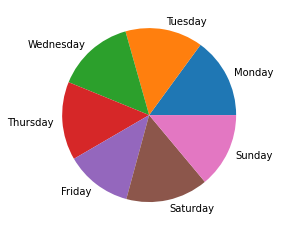

In [41]:
dt.weekday.value_counts().loc[["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]].plot.pie(ylabel='')